<a href="https://colab.research.google.com/github/GradienNinja/Regression/blob/main/Medical_Cost_Regression_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [ ]:
data["sex"] = data["sex"].map({"male" : 1,"female" : 0})

In [ ]:
data["smoker"] = data["smoker"].map({"yes" : 1,"no" : 0})

In [ ]:
data = pd.get_dummies(data, columns=['region'], prefix='region')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
y = data["charges"]

In [ ]:
x = data.drop("charges", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape
x_test.shape

(268, 9)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:

print("Feature weights:", model.coef_)
print("Intercept:", model.intercept_)

Feature weights: [ 2.56975706e+02 -1.85916916e+01  3.37092552e+02  4.25278784e+02
  2.36511289e+04  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]
Intercept: -12390.804294570278


In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 33596915.85136146
RMSE: 5796.2846592762735
R² Score: 0.7835929767120723


In [ ]:

sample_features = [[30, 1, 25.0, 2, 0, 0, 0, 1, 0]] # Example: 30yr old male, 25 BMI, 2 children, non-smoker, Southeast region

predicted_charge = model.predict(sample_features)
print(f"Predicted insurance charge: {predicted_charge[0]:.2f}")

Predicted insurance charge: 4379.47


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


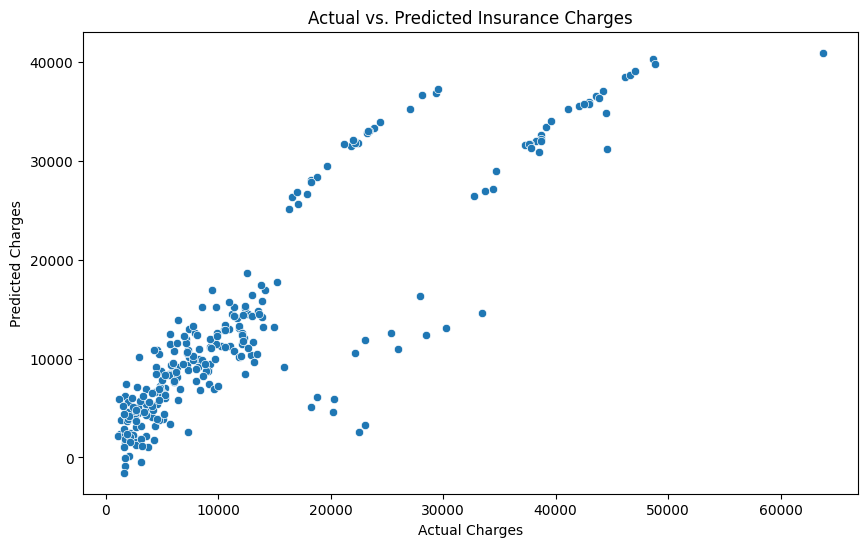

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Create a scatter plot comparing the actual insurance charges (y_test) to the charges predicted by the model (y_pred).
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges") # Label for the x-axis, representing the real insurance charges.
plt.ylabel("Predicted Charges") # Label for the y-axis, representing the charges predicted by the model.
plt.title("Actual vs. Predicted Insurance Charges") # Title of the plot, indicating what is being displayed.
plt.show() # Display the generated plot.